In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import tensorflow as tf
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE


In [5]:
#load files
d0=np.load("d0.npy")
d1=np.load("d1.npy")
A0=np.load("A0.npy")
A1=np.load("A1.npy")

# The dataset 

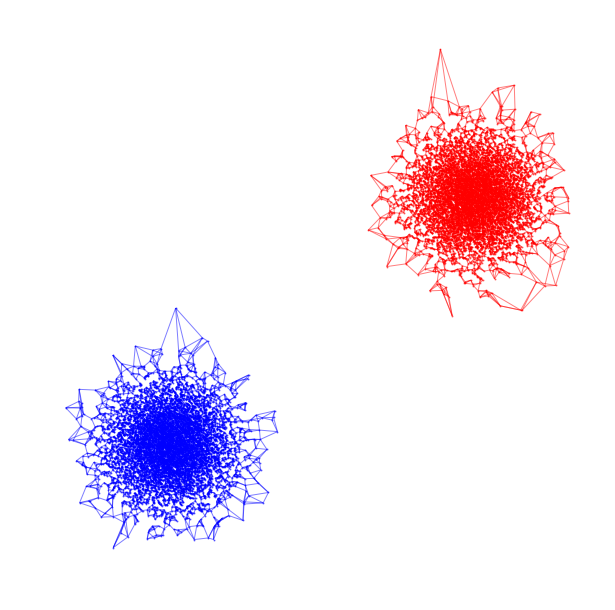

In [7]:
G0=nx.from_numpy_matrix(A0)
fig=plt.figure(figsize=(8,8))
#plt.subplot(1,2,1)
for i in range(len(d0)):
    G0.node[i]['pos']=d0[i]
layout = dict((n, G0.node[n]["pos"]) for n in G0.nodes_iter())
nx.draw(G0, width=1, pos=layout,node_size=1, node_color="b",edge_color="b",alpha=0.5)
G1=nx.from_numpy_matrix(A1)
for i in range(len(d1)):
    G1.node[i]['pos']=d1[i]
layout = dict((n, G1.node[n]["pos"]) for n in G1.nodes_iter())
nx.draw(G1, width=1, pos=layout,node_size=1, node_color="r",edge_color="r",alpha=0.5)

# compose the 2 graphs and shuffle to mix

In [10]:
#now we have the data sets d0n and d1n: we need to build a complete data set with labels and shuffle
data1=np.concatenate((d0,d1))
label1=np.ones(len(data1))
for i in range(int(len(data1)/2)):
    label1[10000+i]=2
data=[]
for i in range(len(data1)):
    data.append((data1[i],label1[i]))
np.random.shuffle(data)

In [11]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
def weight(x,y):
    return np.random.randn(x, y)

In [12]:
dataT=[]
for i in range(len(data)):
    dataT.append(data[i][0])
labelT=[]
for i in range(len(data)):
    labelT.append(data[i][1])

# Transform the dataset

In [13]:
#transform with 3 layers of NN
#first layer
W1=weight(100,2)
dataT1=[]
for i in range(len(dataT)):
    dataT1.append(sigmoid(W1.dot(dataT[i]))+np.random.randn(100))

#second layer
W2=weight(500,100)
dataT2=[]
for i in range(len(dataT1)):
    dataT2.append(sigmoid(W2.dot(dataT1[i])+np.random.randn(500)))
#third layer
W3=weight(1000,500)
dataT3=[]
for i in range(len(dataT2)):
    dataT3.append(sigmoid(W3.dot(dataT2[i])+np.random.randn(1000)))


# compute tsne in the different layers

In [22]:
tsne = TSNE(perplexity=30, n_components=2, init='pca')
#let's see what happens:
Nplot=1000
label=np.array(labelT[:Nplot])
weights = tsne.fit_transform(dataT3[:Nplot])
weights1 = tsne.fit_transform(dataT2[:Nplot])
weights2 = tsne.fit_transform(dataT1[:Nplot])
weights3 = tsne.fit_transform(dataT[:Nplot])

# compute graph for smaller dataset for better plot

In [18]:
#compute distances:
def distance(a,b):
    return (a[0]-b[0])*(a[0]-b[0])+(a[1]-b[1])*(a[1]-b[1])
#use distance matrix to compute the closest for each node
def compute_closest(data,matrix,i,n):
    #sorted matrix
    closest=np.zeros(n)
    a= np.sort(matrix[i])[1:]
    for k in range(len(data)):
        for j in range(n):
            if (a[j]==matrix[i][k]):closest[j]=k
    return closest

In [23]:
dataPlot=dataT[:Nplot]
d0=np.array(dataPlot)[label>1]
d1=np.array(dataPlot)[label<2]
dist_matrixd0=[]
for i in range(len(d0)):
    dist1=[]
    dist_matrixd0.append(dist1)
    for j in range(len(d0)):
        dist1.append(distance(d0[i],d0[j]))
print("distance matrix computed")
closest0=[]
for i in range(len(d0)):
    closest0.append(compute_closest(d0,dist_matrixd0,i,4))
dist_matrixd1=[]
for i in range(len(d1)):
    dist1=[]
    dist_matrixd1.append(dist1)
    for j in range(len(d1)):
        dist1.append(distance(d1[i],d1[j]))
print("distance matrix computed")
closest1=[]
for i in range(len(d1)):
    closest1.append(compute_closest(d1,dist_matrixd1,i,4))

distance matrix computed
distance matrix computed


In [24]:
#build adjency matrix:
A_0=np.ndarray(shape=(len(d0),len(d0)))
for i in range(len(d0)):
    a=np.zeros(len(d0))
    a[closest0[i].astype(int)]=1
    A_0[i]=a
#build adjency matrix:
A_1=np.ndarray(shape=(len(d1),len(d1)))
for i in range(len(d1)):
    a=np.zeros(len(d1))
    a[closest1[i].astype(int)]=1
    A_1[i]=a

# Plot the Graph at every transformation

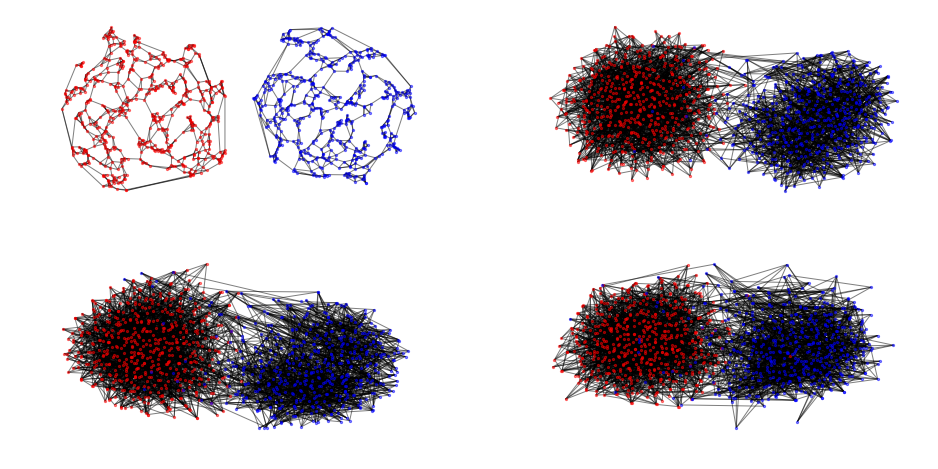

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
G_0=nx.from_numpy_matrix(A_0)
fig=plt.figure(figsize=(16,8))
G_1=nx.from_numpy_matrix(A_1)
plt.subplot(2,2,1)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights3[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights3[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)

plt.subplot(2,2,2)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights2[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights2[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)
plt.subplot(2,2,3)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights1[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights1[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)
plt.subplot(2,2,4)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)

# Learning step
# Feed Forward network with same structure of layers as previous Transformations

In [26]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 1000])
y_ = tf.placeholder(tf.float32, [None, 2])
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [27]:
#the network
W_fc1 = weight_variable([1000, 500])
b_fc1 = bias_variable([500])
h_fc1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([500, 100])
b_fc2 = bias_variable([100])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
W_fc3 = weight_variable([100, 2])
b_fc3 = bias_variable([2])
h_fc3 = tf.matmul(h_fc2_drop, W_fc3) + b_fc3
h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#softmax
y_conv=tf.nn.softmax(h_fc3)
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [28]:
data=np.array(dataT3)
target=np.ndarray(shape=(len(labelT),2))
for i in range(len(target)):
    if (labelT[i]==1): target[i]=np.array([1,0])
    else: target[i]=[0,1]

# Training

In [29]:
sess = tf.Session()
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
sess.run(tf.global_variables_initializer())
finalRepresentations = []
for i in range(300):
    i=i+1
    batchD = data[i*50:(i+1)*50]
    batchT = target[i*50:(i+1)*50]
    if (i%100 == 0):
        train_accuracy = accuracy.eval(session=sess,feed_dict={x:batchD, y_: batchT, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        #finalRepresentations.append(h_fc2.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0}))

    train_step.run(session=sess,feed_dict={x: batchD, y_: batchT, keep_prob: 0.75})

print("test accuracy %g"%accuracy.eval(session=sess,feed_dict={x: data, y_: target, keep_prob: 1.0}))

step 100, training accuracy 1
step 200, training accuracy 0.94
step 300, training accuracy 0.98
test accuracy 0.9771


# Compute TSNE at each Layer

In [30]:
#on raw data
weights_0 = tsne.fit_transform(data[:Nplot])
print("layer 0 done")
#compute layer 1 continuous 1000 -> 500
hidden_layer1 = h_fc1.eval(session=sess, feed_dict={x:data[:Nplot], keep_prob:1.0})
weights_1 = tsne.fit_transform(hidden_layer1)
print("layer 1 done")
#compute layer 2 continuous 500 -> 100
hidden_layer2 = h_fc2.eval(session=sess, feed_dict={x:data[:Nplot], keep_prob:1.0})
weights_2 = tsne.fit_transform(hidden_layer2)
print("layer 2 done")
#compute layer 3 continuous 100 -> 2
hidden_layer3 = h_fc3.eval(session=sess, feed_dict={x:data[:Nplot], keep_prob:1.0})
weights_3 = tsne.fit_transform(hidden_layer3)
print("layer 3 done")

layer 0 done
layer 1 done
layer 2 done
layer 3 done


# Plot the Graph

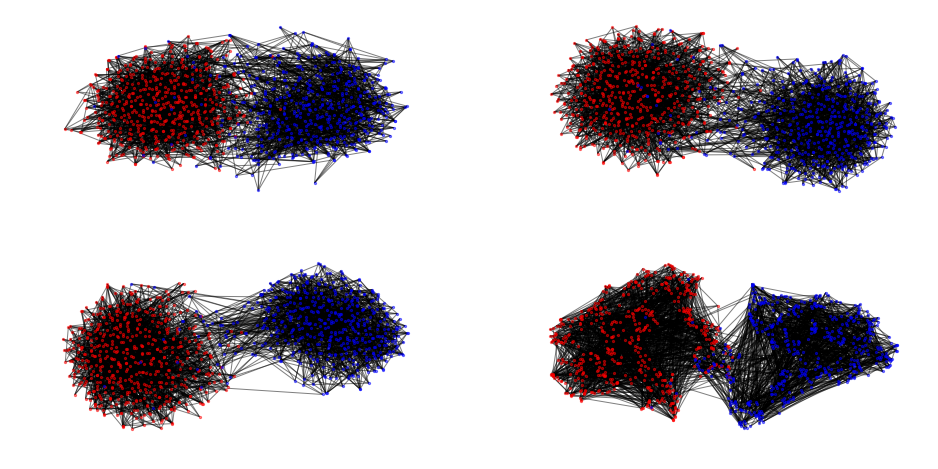

In [31]:
fig=plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights_0[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights_0[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)

plt.subplot(2,2,2)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights_1[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights_1[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)
plt.subplot(2,2,3)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights_2[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights_2[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)
plt.subplot(2,2,4)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights_3[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights_3[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)

# Compare initial manifold with final one

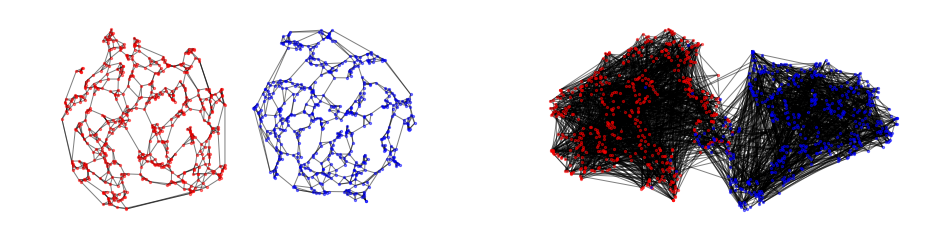

In [32]:
#finally we arrive at:
fig=plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights3[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights3[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)
plt.subplot(1,2,2)
for i in range(len(d0)):
    G_0.node[i]['pos']=weights_3[label>1][i]
layout = dict((n, G_0.node[n]["pos"]) for n in G_0.nodes_iter())
nx.draw(G_0, width=1, pos=layout,node_size=5,alpha=0.5)
for i in range(len(d1)):
    G_1.node[i]['pos']=weights_3[label<2][i]
layout = dict((n, G_1.node[n]["pos"]) for n in G_1.nodes_iter())
nx.draw(G_1, width=1, pos=layout,node_size=5,node_color="b",alpha=0.5)

# Conclusion
# You might achieve very good results (here 98%), however you learned a manifold that is very different from the "True" one (local topology is completely lost)